In [9]:
# Run in terminal or command prompt
# python3 -m spacy download en
#gensim, spacy needs to be imported
import numpy as np
import pandas as pd
import re, nltk

%matplotlib inline

import warnings
#from text_unidecode import unidecode
from collections import deque
warnings.filterwarnings('ignore')


import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from node2vec import Node2Vec

sns.set_style('whitegrid')


In [ ]:
#node2vec = Node2Vec(data_clean['ingredient'], dimensions=20, walk_length=16, num_walks=100, workers=2)

In [4]:
dataset = pd.read_excel("AllRecipesInitial.xlsx")

In [12]:
dataset['ingredient'] = dataset['ingredient'].apply(lambda x: x.replace(" ","_"))  #apply(lambda x: "%s" % '_'.join(x))
dataset['ingredient'] = dataset['ingredient'].apply(lambda x: x.replace("agar_agaragar_agar", "agar_agar"))

In [25]:
data = dataset.drop(['recipe_title','amount','unit_of_measurement', 'instructions', 'url'], axis = 1)
data.head()


,ID,ingredient
0,VZUG1,gelatine
1,VZUG1,baking_powder
2,VZUG1,vanilla_pod
3,VZUG1,banana
4,VZUG1,sugar


In [29]:
List_graph = []
for i in range (len(data)):
    List_graph.append((data['ID'][i],data['ingredient'][i]))
List_graph    

    

[('VZUG1', 'gelatine'),
 ('VZUG1', 'baking_powder'),
 ('VZUG1', 'vanilla_pod'),
 ('VZUG1', 'banana'),
 ('VZUG1', 'sugar'),
 ('VZUG1', 'salt'),
 ('VZUG1', 'muscovado_sugar'),
 ('VZUG1', 'water'),
 ('VZUG1', 'double_cream'),
 ('VZUG1', 'sunflower_oil'),
 ('VZUG1', 'full_cream'),
 ('VZUG1', 'butter'),
 ('VZUG1', 'white_flour'),
 ('VZUG1', 'egg'),
 ('VZUG2', 'egg'),
 ('VZUG2', 'sugar'),
 ('VZUG2', 'apricot'),
 ('VZUG2', 'vanilla_pod'),
 ('VZUG2', 'flour'),
 ('VZUG2', 'chocolate'),
 ('VZUG2', 'butter'),
 ('VZUG2', 'baking_powder'),
 ('VZUG2', 'cocoa_powder'),
 ('VZUG2', 'icing_sugar'),
 ('VZUG3', 'oatmeal'),
 ('VZUG3', 'butter'),
 ('VZUG3', 'nutmeg'),
 ('VZUG3', 'apple'),
 ('VZUG3', 'cinnamon'),
 ('VZUG3', 'brown_sugar'),
 ('VZUG3', 'water'),
 ('VZUG3', 'flour'),
 ('VZUG4', 'mango'),
 ('VZUG4', 'sugar'),
 ('VZUG4', 'egg_yolk'),
 ('VZUG4', 'coconut_milk'),
 ('VZUG4', 'cream'),
 ('VZUG4', 'lime'),
 ('VZUG4', 'egg_white'),
 ('VZUG4', 'egg'),
 ('VZUG4', 'quark'),
 ('VZUG4', 'baking_powder'),
 (

Name: 
Type: Graph
Number of nodes: 26486
Number of edges: 186086
Average degree:  14.0516


MemoryError: 

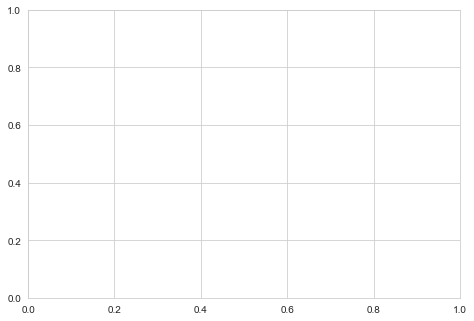

In [31]:
g = nx.Graph()
#g.add_edges_from([(data['ID'][0],data['ingredient'][0]), (data['ID'][1],data['ingredient'][1])])
g.add_edges_from(List_graph)
print(nx.info(g))
nx.draw(g)
plt.show(g)
